# Predict Pokemon battles using Machine Learning

Import libraries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Datasets

In [228]:
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")
tests_df = pd.read_csv("tests.csv")

# __`pokemon_df`__

In [229]:
pokemon_df

#                    Name    Type 1  Type 2   HP  Attack  Defense  \
0      1               Bulbasaur     Grass  Poison   45      49       49   
1      2                 Ivysaur     Grass  Poison   60      62       63   
2      3                Venusaur     Grass  Poison   80      82       83   
3      4           Mega Venusaur     Grass  Poison   80     100      123   
4      5              Charmander      Fire     NaN   39      52       43   
5      6              Charmeleon      Fire     NaN   58      64       58   
6      7               Charizard      Fire  Flying   78      84       78   
7      8        Mega Charizard X      Fire  Dragon   78     130      111   
8      9        Mega Charizard Y      Fire  Flying   78     104       78   
9     10                Squirtle     Water     NaN   44      48       65   
10    11               Wartortle     Water     NaN   59      63       80   
11    12               Blastoise     Water     NaN   79      83      100   
12    13          Mega Blastoise     Water     NaN   79     103      120   
13    14                Caterpie       Bug     NaN   45      30       35   
14    15                 Metapod       Bug     NaN   50      20       55   
15    16              Butterfree       Bug  Flying   60      45       50   
16    17                  Weedle       Bug  Poison   40      35       30   
17    18                  Kakuna       Bug  Poison   45      25       50   
18    19                Beedrill       Bug  Poison   65      90       40   
19    20           Mega Beedrill       Bug  Poison   65     150       40   
20    21                  Pidgey    Normal  Flying   40      45       40   
21    22               Pidgeotto    Normal  Flying   63      60       55   
22    23                 Pidgeot    Normal  Flying   83      80       75   
23    24            Mega Pidgeot    Normal  Flying   83      80       80   
24    25                 Rattata    Normal     NaN   30      56       35   
25    26                Raticate    Normal     NaN   55      81       60   
26    27                 Spearow    Normal  Flying   40      60       30   
27    28                  Fearow    Normal  Flying   65      90       65   
28    29                   Ekans    Poison     NaN   35      60       44   
29    30                   Arbok    Poison     NaN   60      85       69   
..   ...                     ...       ...     ...  ...     ...      ...   
770  771                 Sylveon     Fairy     NaN   95      65       65   
771  772                Hawlucha  Fighting  Flying   78      92       75   
772  773                 Dedenne  Electric   Fairy   67      58       57   
773  774                 Carbink      Rock   Fairy   50      50      150   
774  775                   Goomy    Dragon     NaN   45      50       35   
775  776                 Sliggoo    Dragon     NaN   68      75       53   
776  777                  Goodra    Dragon     NaN   90     100       70   
777  778                  Klefki     Steel   Fairy   57      80       91   
778  779                Phantump     Ghost   Grass   43      70       48   
779  780               Trevenant     Ghost   Grass   85     110       76   
780  781  Pumpkaboo Average Size     Ghost   Grass   49      66       70   
781  782    Pumpkaboo Small Size     Ghost   Grass   44      66       70   
782  783    Pumpkaboo Large Size     Ghost   Grass   54      66       70   
783  784    Pumpkaboo Super Size     Ghost   Grass   59      66       70   
784  785  Gourgeist Average Size     Ghost   Grass   65      90      122   
785  786    Gourgeist Small Size     Ghost   Grass   55      85      122   
786  787    Gourgeist Large Size     Ghost   Grass   75      95      122   
787  788    Gourgeist Super Size     Ghost   Grass   85     100      122   
788  789                Bergmite       Ice     NaN   55      69       85   
789  790                 Avalugg       Ice     NaN   95     117      184   
790  791                  Noibat    Flying  Dragon   40

#### Print shape of pokemon_df

In [230]:
pokemon_df.shape

(800, 12)

In [231]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


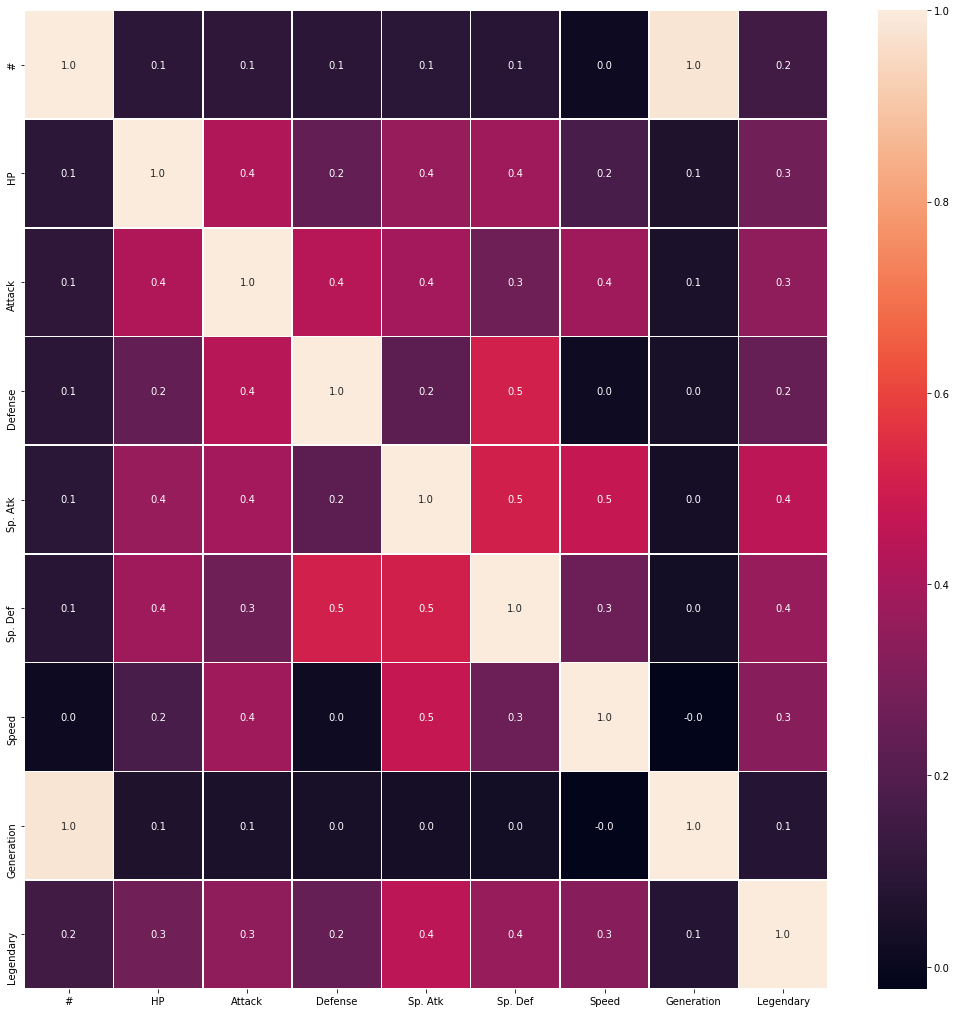

In [232]:
f, ax = plt.subplots(figsize =(18, 18))
sns.heatmap(pokemon_df.corr(), annot=True, linewidth=.5, fmt= '.1f',ax=ax)

plt.show()

In [233]:
pokemon_df.corr()

#        HP    Attack   Defense   Sp. Atk   Sp. Def  \
#           1.000000  0.097712  0.102664  0.094691  0.089199  0.085596   
HP          0.097712  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.102664  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.094691  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.089199  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.085596  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.012181  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.983428  0.058683  0.051451  0.042419  0.036437  0.028486   
Legendary   0.154336  0.273620  0.345408  0.246377  0.448907  0.363937   

               Speed  Generation  Legendary  
#           0.012181    0.983428   0.154336  
HP          0.175952    0.058683   0.273620  
Attack      0.381240    0.051451   0.345408  
Defense     0.015227    0.042419   0.246377  
Sp. Atk     0.473018    0.036437   0.448907  
Sp. Def     0.259133    0.028486   0.363937  
Speed       1.000000   -0.023121   0.326715  
Generation -0.023121    1.000000   0.079794  
Legendary   0.326715    0.079794   1.000000

## As you can see, generation and lengendary columns do not have much to do with and of the other data, so we decided to not use these 2 columns with our dataset

## Removing the Generation and Lengendary columns since they are irrelavent to pokemon combat wins

In [234]:
features = ['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

print(pokemon_df[features])


       #    Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      1     Grass  Poison   45      49       49       65       65     45
1      2     Grass  Poison   60      62       63       80       80     60
2      3     Grass  Poison   80      82       83      100      100     80
3      4     Grass  Poison   80     100      123      122      120     80
4      5      Fire     NaN   39      52       43       60       50     65
5      6      Fire     NaN   58      64       58       80       65     80
6      7      Fire  Flying   78      84       78      109       85    100
7      8      Fire  Dragon   78     130      111      130       85    100
8      9      Fire  Flying   78     104       78      159      115    100
9     10     Water     NaN   44      48       65       50       64     43
10    11     Water     NaN   59      63       80       65       80     58
11    12     Water     NaN   79      83      100       85      105     78
12    13     Water     NaN   79     10

## Removing all the NaN values and replacing it with None

In [235]:
pokemon_update_df = pokemon_df.where((pd.notnull(pokemon_df)), None)
pokemon_update_df[features]

#    Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      1     Grass  Poison   45      49       49       65       65     45
1      2     Grass  Poison   60      62       63       80       80     60
2      3     Grass  Poison   80      82       83      100      100     80
3      4     Grass  Poison   80     100      123      122      120     80
4      5      Fire    None   39      52       43       60       50     65
5      6      Fire    None   58      64       58       80       65     80
6      7      Fire  Flying   78      84       78      109       85    100
7      8      Fire  Dragon   78     130      111      130       85    100
8      9      Fire  Flying   78     104       78      159      115    100
9     10     Water    None   44      48       65       50       64     43
10    11     Water    None   59      63       80       65       80     58
11    12     Water    None   79      83      100       85      105     78
12    13     Water    None   79     103      120      135      115     78
13    14       Bug    None   45      30       35       20       20     45
14    15       Bug    None   50      20       55       25       25     30
15    16       Bug  Flying   60      45       50       90       80     70
16    17       Bug  Poison   40      35       30       20       20     50
17    18       Bug  Poison   45      25       50       25       25     35
18    19       Bug  Poison   65      90       40       45       80     75
19    20       Bug  Poison   65     150       40       15       80    145
20    21    Normal  Flying   40      45       40       35       35     56
21    22    Normal  Flying   63      60       55       50       50     71
22    23    Normal  Flying   83      80       75       70       70    101
23    24    Normal  Flying   83      80       80      135       80    121
24    25    Normal    None   30      56       35       25       35     72
25    26    Normal    None   55      81       60       50       70     97
26    27    Normal  Flying   40      60       30       31       31     70
27    28    Normal  Flying   65      90       65       61       61    100
28    29    Poison    None   35      60       44       40       54     55
29    30    Poison    None   60      85       69       65       79     80
..   ...       ...     ...  ...     ...      ...      ...      ...    ...
770  771     Fairy    None   95      65       65      110      130     60
771  772  Fighting  Flying   78      92       75       74       63    118
772  773  Electric   Fairy   67      58       57       81       67    101
773  774      Rock   Fairy   50      50      150       50      150     50
774  775    Dragon    None   45      50       35       55       75     40
775  776    Dragon    None   68      75       53       83      113     60
776  777    Dragon    None   90     100       70      110      150     80
777  778     Steel   Fairy   57      80       91       80       87     75
778  779     Ghost   Grass   43      70       48       50       60     38
779  780     Ghost   Grass   85     110       76       65       82     56
780  781     Ghost   Grass   49      66       70       44       55     51
781  782     Ghost   Grass   44      66       70       44       55     56
782  783     Ghost   Grass   54      66       70       44       55     46
783  784     Ghost   Grass   59      66       70       44       55     41
784  785     Ghost   Grass   65      90      122       58       75     84
785  786     Ghost   Grass   55      85      122       58       75     99
786  787     Ghost   Grass   75      95      122       58       75     69
787  788     Ghost   Grass   85     100      122       58       75     54
788  789       Ice    None   55      69       85       32       35     28
789  790       Ice    None   95     117      184       44       46     28
790  791    Flying  Dragon   40      30       35       45       40     55
791  792    Flying  Dragon   85      70       80       97       80    123
792  793   

In [236]:
pokemon_update_df[features].isnull().sum()

#            0
Type 1       0
Type 2     386
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
dtype: int64

## Scatter plots to show Attack & Defense as well as Special Attack & Defense

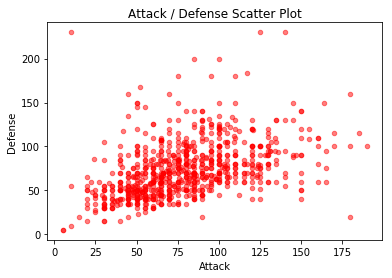

In [237]:
pokemon_update_df.plot(kind='scatter', x='Attack', y='Defense', alpha=.5, color='red')
plt.xlabel('Attack')
plt.ylabel('Defense')

plt.title('Attack / Defense Scatter Plot')

plt.show()

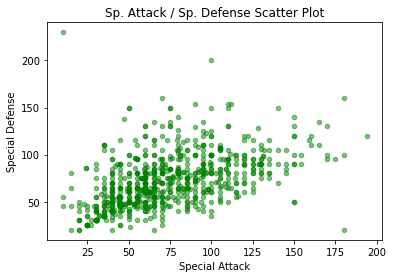

In [238]:
pokemon_update_df.plot(kind='scatter', x='Sp. Atk', y='Sp. Def', alpha=.5, color='green')
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')

plt.title('Sp. Attack / Sp. Defense Scatter Plot')

plt.show()

In [239]:
combats_df

First_pokemon  Second_pokemon  Winner
0                266             298     298
1                702             701     701
2                191             668     668
3                237             683     683
4                151             231     151
5                657             752     657
6                192             134     134
7                 73             545     545
8                220             763     763
9                302              31      31
10               442             130     130
11               701             624     701
12                15             283     283
13               151              87     151
14               269             462     269
15               763             448     448
16               143             263     263
17               365             240     240
18               499             774     499
19               563             578     563
20               440             687     687
21               373             441     441
22               654             671     671
23               121             355     121
24               609             649     649
25               270             708     270
26               460             568     568
27               626             767     767
28               139             451     139
29               694             747     694
...              ...             ...     ...
49970            500             789     500
49971             10             785     785
49972            194             117     194
49973            258             420     420
49974            455             762     455
49975            760             358     358
49976            283             176     283
49977            778             380     380
49978            732             214     732
49979            540             233     540
49980             62              25      25
49981             41             520     520
49982            636             290     636
49983            599             484     484
49984            126             425     425
49985            799             513     513
49986            606              24      24
49987            293             448     448
49988             35             714     714
49989            603             559     603
49990            204             368     368
49991            695             717     717
49992            592             703     703
49993            728             762     728
49994            657             681     681
49995            707             126     707
49996            589             664     589
49997            303             368     368
49998            109              89     109
49999              9              73       9

[50000 rows x 3 columns]

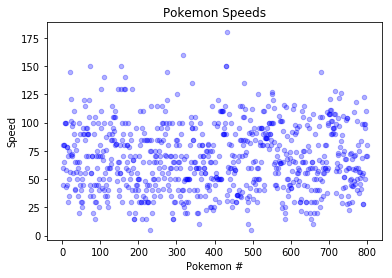

In [249]:
pokemon_update_df.plot(kind='scatter', x='#', y='Speed', alpha=.3, color='blue')
plt.xlabel('Pokemon #')
plt.ylabel('Speed')

plt.title('Pokemon Speeds')

plt.show()

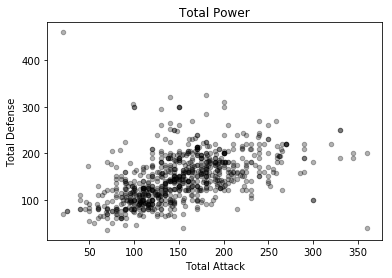

In [274]:
total_attack = pokemon_update_df['Attack'] + pokemon_update_df['Sp. Atk']
total_defense = pokemon_update_df['Defense'] + pokemon_update_df['Sp. Def']


stat_df = pd.concat([total_attack, total_defense], axis=1)

stat.plot(kind='scatter', x=0, y=1, alpha=.3, color='black')
plt.xlabel('Total Attack')
plt.ylabel('Total Defense')

plt.title('Total Power')

plt.show()

## Renaming 'First_pokemon' to '#' to combine 2 dataframes

In [219]:
#result = pd.concat([pokemon_update_df, combats_df], axis=1, join_axes=['#'])
combats_df = combats_df.rename(columns={'First_pokemon': '#', 'Second_pokemon': 'Battle Pokemon'})
combats_df

#  Battle Pokemon  Winner
0      266             298     298
1      702             701     701
2      191             668     668
3      237             683     683
4      151             231     151
5      657             752     657
6      192             134     134
7       73             545     545
8      220             763     763
9      302              31      31
10     442             130     130
11     701             624     701
12      15             283     283
13     151              87     151
14     269             462     269
15     763             448     448
16     143             263     263
17     365             240     240
18     499             774     499
19     563             578     563
20     440             687     687
21     373             441     441
22     654             671     671
23     121             355     121
24     609             649     649
25     270             708     270
26     460             568     568
27     626             767     767
28     139             451     139
29     694             747     694
...    ...             ...     ...
49970  500             789     500
49971   10             785     785
49972  194             117     194
49973  258             420     420
49974  455             762     455
49975  760             358     358
49976  283             176     283
49977  778             380     380
49978  732             214     732
49979  540             233     540
49980   62              25      25
49981   41             520     520
49982  636             290     636
49983  599             484     484
49984  126             425     425
49985  799             513     513
49986  606              24      24
49987  293             448     448
49988   35             714     714
49989  603             559     603
49990  204             368     368
49991  695             717     717
49992  592             703     703
49993  728             762     728
49994  657             681     681
49995  707             126     707
49996  589             664     589
49997  303             368     368
49998  109              89     109
49999    9              73       9

[50000 rows x 3 columns]

## Testing merge with both dataframes

In [220]:
result = pd.merge(pokemon_update_df[features], combats_df, on="#", how='left')
result

# Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0        1  Grass  Poison  45      49       49       65       65     45   
1        1  Grass  Poison  45      49       49       65       65     45   
2        1  Grass  Poison  45      49       49       65       65     45   
3        1  Grass  Poison  45      49       49       65       65     45   
4        1  Grass  Poison  45      49       49       65       65     45   
5        1  Grass  Poison  45      49       49       65       65     45   
6        1  Grass  Poison  45      49       49       65       65     45   
7        1  Grass  Poison  45      49       49       65       65     45   
8        1  Grass  Poison  45      49       49       65       65     45   
9        1  Grass  Poison  45      49       49       65       65     45   
10       1  Grass  Poison  45      49       49       65       65     45   
11       1  Grass  Poison  45      49       49       65       65     45   
12       1  Grass  Poison  45      49       49       65       65     45   
13       1  Grass  Poison  45      49       49       65       65     45   
14       1  Grass  Poison  45      49       49       65       65     45   
15       1  Grass  Poison  45      49       49       65       65     45   
16       1  Grass  Poison  45      49       49       65       65     45   
17       1  Grass  Poison  45      49       49       65       65     45   
18       1  Grass  Poison  45      49       49       65       65     45   
19       1  Grass  Poison  45      49       49       65       65     45   
20       1  Grass  Poison  45      49       49       65       65     45   
21       1  Grass  Poison  45      49       49       65       65     45   
22       1  Grass  Poison  45      49       49       65       65     45   
23       1  Grass  Poison  45      49       49       65       65     45   
24       1  Grass  Poison  45      49       49       65       65     45   
25       1  Grass  Poison  45      49       49       65       65     45   
26       1  Grass  Poison  45      49       49       65       65     45   
27       1  Grass  Poison  45      49       49       65       65     45   
28       1  Grass  Poison  45      49       49       65       65     45   
29       1  Grass  Poison  45      49       49       65       65     45   
...    ...    ...     ...  ..     ...      ...      ...      ...    ...   
49986  800   Fire   Water  80     110      120      130       90     70   
49987  800   Fire   Water  80     110      120      130       90     70   
49988  800   Fire   Water  80     110      120      130       90     70   
49989  800   Fire   Water  80     110      120      130       90     70   
49990  800   Fire   Water  80     110      120      130       90     70   
49991  800   Fire   Water  80     110      120      130       90     70   
49992  800   Fire   Water  80     110      120      130       90     70   
49993  800   Fire   Water  80     110      120      130       90     70   
49994  800   Fire   Water  80     110      120      130       90     70   
49995  800   Fire   Water  80     110      120      130       90     70   
49996  800   Fire   Water  80     110      120      130       90     70   
49997  800   Fire   Water  80     110      120      130       90     70   
49998  800   Fire   Water  80     110      120      130       90     70   
49999  800   Fire   Water  80     110      120      130       90     70   
50000  800   Fire   Water  80     110      120      130       90     70   
50001  800   Fire   Water  80     110      120      130       90     70   
50002  800   Fire   Water  80     110      120      130       90     70   
50003  800   Fire   Water  80     110      120      130       90     70   
50004  800   Fire   Water  80     110      120      130       90     70   
50005  800   Fire   Water  80     110      120      130       90     70   
50006  800   Fire   Water  80     110      120      130       90     70   
50007  800   Fire   Water  80     

In [221]:
result.isnull().sum()

#                     0
Type 1                0
Type 2            24039
HP                    0
Attack                0
Defense               0
Sp. Atk               0
Sp. Def               0
Speed                 0
Battle Pokemon       16
Winner               16
dtype: int64

## Lambda to show number of won or loss battles

In [222]:
won_df = lambda x: combats_df[(combats_df["#"] == x) & (combats_df["Winner"] == x)]
won_df

matches_won_df = lambda x: combats_df[ ( (combats_df["#"] == x) | (combats_df["Battle Pokemon"] == x) )  & (combats_df["Winner"] == x) ]

In [223]:
lost_to_df = lambda x: combats_df[(combats_df["#"] == x) & (combats_df["Winner"] != x)]
lost_to_df

matches_loss_df = lambda x: combats_df[ ( (combats_df["#"] == x) | (combats_df["Battle Pokemon"] == x) )  & (combats_df["Winner"] != x) ]

In [224]:
for k in range(len(pokemon_df)):
#    print(lost_to_df(k))
    print(matches_won_df(k))

Empty DataFrame
Columns: [#, Battle Pokemon, Winner]
Index: []
         #  Battle Pokemon  Winner
3057   199               1       1
4154     1             194       1
4830   215               1       1
4883     1             285       1
5425     1             579       1
8156     1             324       1
8570     1             385       1
8897   558               1       1
9409   302               1       1
10837    1             779       1
14076    1             684       1
15256   94               1       1
16855  433               1       1
17502  456               1       1
17823  620               1       1
18494  211               1       1
20067  667               1       1
20853    1             215       1
22652  323               1       1
23387  374               1       1
25510  382               1       1
26251  433               1       1
27356    1             302       1
27453   50               1       1
28155  215               1       1
29302  762               1 

         #  Battle Pokemon  Winner
168    539              30      30
181     30             587      30
772    256              30      30
907     30             198      30
1494    43              30      30
2393   153              30      30
2521    30             241      30
3818   668              30      30
5766    30             680      30
6073    30             352      30
6182    30             800      30
6216    30              64      30
6898   640              30      30
6961   235              30      30
8136    30             672      30
9628   617              30      30
10951   30              42      30
11256  488              30      30
12166  455              30      30
13258  239              30      30
13269   30             457      30
13770  596              30      30
14593  582              30      30
14897   64              30      30
14912   14              30      30
15192  328              30      30
15549   30             208      30
15674  515          

         #  Battle Pokemon  Winner
2236    64             403      64
2420    64             485      64
2860   281              64      64
3206    64             470      64
4135    64              14      64
4968    64             408      64
5332   661              64      64
7163   660              64      64
7433    64             334      64
7479    64             744      64
7728    50              64      64
8636   471              64      64
9856    64             482      64
10762   47              64      64
10931  680              64      64
10985  174              64      64
11161   64             733      64
11259   64             517      64
11391   11              64      64
12898   64             530      64
13296  755              64      64
15323   64             680      64
15982  176              64      64
17822   64             624      64
18774  659              64      64
19554  330              64      64
22088   64              81      64
22759  510          

         #  Battle Pokemon  Winner
1174   104             190     104
1497   762             104     104
2000   104             741     104
2145   104             118     104
2367   708             104     104
2391   445             104     104
6078    51             104     104
6501   447             104     104
7458   320             104     104
7797   298             104     104
8261   148             104     104
9020   104             126     104
9474   104             218     104
11560  104             319     104
11781  104             392     104
11837  791             104     104
14444  104             621     104
15310  761             104     104
16068  104             168     104
16295  354             104     104
19060  775             104     104
20968  104             457     104
21577  119             104     104
21838  104             592     104
21904  639             104     104
22283  104             333     104
22501  104             335     104
22818   35          

         #  Battle Pokemon  Winner
58     141             721     141
115    141             152     141
1909   730             141     141
2852    73             141     141
3560   253             141     141
3622   141             483     141
4261    94             141     141
4917   721             141     141
5008   141             395     141
5061   141             488     141
7250   141             415     141
7738   141             789     141
7816    75             141     141
7832   651             141     141
8529   141             320     141
8737   488             141     141
8979   141             691     141
9668    83             141     141
10283  395             141     141
10933  780             141     141
12537  141             487     141
12876  141             384     141
13284  266             141     141
13501  141              95     141
14488  141             460     141
15341  141             237     141
15688  292             141     141
15968  293          

         #  Battle Pokemon  Winner
678    174             224     174
1500   670             174     174
1544   174             621     174
2075   174             262     174
2159   174             482     174
6781   751             174     174
7255   174             378     174
7718   174             188     174
8097    29             174     174
9799   675             174     174
10333  445             174     174
10415  174             492     174
11162  796             174     174
12620  174             599     174
13215  174             734     174
13557  174             460     174
13789  174             599     174
16598  174             197     174
17047  688             174     174
17276  354             174     174
17702   76             174     174
17793  174             779     174
18250  174             149     174
18358  174             509     174
18447  174             640     174
18630  174             332     174
19784  564             174     174
20369  439          

         #  Battle Pokemon  Winner
90     686             213     213
251    213             442     213
1047   107             213     213
2701   353             213     213
3265   213             297     213
4373   213             641     213
4815   217             213     213
5326   213              76     213
5707   445             213     213
6159   213             323     213
6278   213             595     213
6597   213              83     213
7152    39             213     213
7196   252             213     213
8195   213              42     213
8427   251             213     213
9394   213             251     213
9560   117             213     213
9880   764             213     213
11010  335             213     213
11683  213             218     213
11785  227             213     213
15181  213              36     213
18181  755             213     213
19464  213             190     213
19767  213             310     213
19790  386             213     213
21536  540          

         #  Battle Pokemon  Winner
203     97             250     250
307    250             357     250
1210   250             692     250
1511   217             250     250
1925   250             673     250
2464   696             250     250
3709   269             250     250
5204   548             250     250
7375   250             238     250
7682   250             527     250
9836   371             250     250
9941   361             250     250
10083  156             250     250
10574  250             376     250
10618  359             250     250
10620  250             575     250
10876  250              50     250
11288  361             250     250
12733  250              88     250
12842  525             250     250
12846  122             250     250
13094  571             250     250
13291  800             250     250
15125  440             250     250
15668  258             250     250
15809  294             250     250
17757  250             584     250
17981  250          

         #  Battle Pokemon  Winner
719    286             680     286
1024   286              21     286
2535   286             309     286
3042   286             460     286
5127   668             286     286
5560   286             564     286
5990   286             364     286
6310   286             650     286
6387    38             286     286
7116   286             321     286
7659   286             642     286
8084   240             286     286
8152   278             286     286
8411   286              35     286
8624    39             286     286
9660    75             286     286
9715   363             286     286
10314  286             307     286
10695  286             779     286
10878  540             286     286
11133  286             742     286
11439  267             286     286
13500  286             391     286
13560  657             286     286
13865  140             286     286
14212   50             286     286
14398  683             286     286
14408  604          

         #  Battle Pokemon  Winner
3080   325             114     325
5224   195             325     325
5547   325             382     325
8238   325             218     325
9852   325             529     325
9916   325              94     325
12906  666             325     325
15011  224             325     325
15067  516             325     325
16714  315             325     325
17338  327             325     325
19181  517             325     325
22070  325             738     325
23099  546             325     325
25691  325              76     325
25780  761             325     325
26559  798             325     325
26864  379             325     325
27988  325             644     325
28722  449             325     325
29374  325              10     325
34423  564             325     325
36772  325             241     325
38178  325             331     325
38959  160             325     325
39894  378             325     325
40449  325             599     325
41622  558          

         #  Battle Pokemon  Winner
2835   564             352     352
3567   211             352     352
3654   352             354     352
4196    96             352     352
5318   762             352     352
8059   266             352     352
8124   599             352     352
8817   352             117     352
8819   749             352     352
10595  352             415     352
14486   10             352     352
14763  411             352     352
15306  531             352     352
15961   82             352     352
16433  145             352     352
16641  594             352     352
17875  352             744     352
22318  352             486     352
22451  516             352     352
23321  189             352     352
25460  352             433     352
25504  352              70     352
25726   91             352     352
26376  352             385     352
26669  352             375     352
26931  352             461     352
28052  352             577     352
29147  637          

         #  Battle Pokemon  Winner
34     260             381     381
134    381              73     381
1805   381             150     381
2962   381             779     381
4123   381             601     381
4307   381             648     381
4500    71             381     381
6572     1             381     381
6943   634             381     381
7291   381             644     381
7953   599             381     381
8231   733             381     381
9136   381             789     381
9875   381             661     381
10859  262             381     381
19891  584             381     381
22435   70             381     381
26119  381             395     381
26475  381             602     381
28740  445             381     381
28894  766             381     381
31626  486             381     381
32573  406             381     381
33974  381             411     381
34061  381             775     381
36134  381             218     381
36418   35             381     381
37283  512          

         #  Battle Pokemon  Winner
2552   310             407     407
3219    41             407     407
3354   767             407     407
3400   182             407     407
3824   675             407     407
4311   407             324     407
4628   594             407     407
5149   500             407     407
6556   407             433     407
8678   238             407     407
10351  489             407     407
11800  244             407     407
12570  360             407     407
13168  470             407     407
14090  399             407     407
14604  627             407     407
19543  599             407     407
20399  757             407     407
30372  669             407     407
30444   87             407     407
30941  407             150     407
31530  407              53     407
33139  577             407     407
33934  678             407     407
34131  585             407     407
35189  461             407     407
37998  577             407     407
38151  407          

         #  Battle Pokemon  Winner
294    559             431     431
372     29             431     431
1169   431             169     431
2342    55             431     431
2622   673             431     431
3499   278             431     431
3505   431             617     431
3551   431             405     431
3695   196             431     431
3833   399             431     431
3919   511             431     431
4437   431             268     431
5225   474             431     431
5520   431             233     431
5671   291             431     431
5856   760             431     431
5930    13             431     431
6467   431             375     431
7061   571             431     431
7073   431               6     431
7115   598             431     431
7628   277             431     431
8759   762             431     431
8799   431             693     431
8906   318             431     431
9018   431             445     431
9325   431             746     431
10234  431          

         #  Battle Pokemon  Winner
5510    49             468     468
7925   290             468     468
9485   798             468     468
11458  399             468     468
18272  684             468     468
18952  113             468     468
21352  468             406     468
26651  754             468     468
30648  468             226     468
32998  468             678     468
33755  468             445     468
37263  468             190     468
42108  468             447     468
43810  331             468     468
44843  468             660     468
46899  667             468     468
         #  Battle Pokemon  Winner
417    454             469     469
1388   469              36     469
1396   310             469     469
1873   454             469     469
1961   469             393     469
2053   469             662     469
5907   145             469     469
5981   469             692     469
6542   733             469     469
6706   108             469     469
6708   469          

         #  Battle Pokemon  Winner
290    106             505     505
363    505             502     505
851    369             505     505
1118   375             505     505
1335   632             505     505
1603   505             289     505
1706   119             505     505
2660   505             285     505
2720   742             505     505
3966   161             505     505
4512   505             435     505
6445   505             442     505
7134   505             642     505
8186   505             245     505
8441   505             182     505
8811   505             173     505
9387   505             664     505
10281  258             505     505
10581    2             505     505
10776  580             505     505
11421  137             505     505
11561  582             505     505
12769  777             505     505
14675  505             303     505
16045  505             204     505
16871  305             505     505
17005  505             688     505
17550  672          

         #  Battle Pokemon  Winner
1458   251             539     539
2920   251             539     539
3087   123             539     539
3875   539              37     539
6435   562             539     539
6518   605             539     539
7697   615             539     539
7948   304             539     539
8825   539             492     539
9108   698             539     539
11820  776             539     539
13583  774             539     539
13837  539             119     539
14667  433             539     539
14989  539             594     539
15933  201             539     539
16251  539             458     539
16745  539             599     539
16780  539              91     539
17161  195             539     539
17246  114             539     539
18305  539             370     539
18583  539              53     539
18932  671             539     539
19650  539             506     539
20723  751             539     539
21090  218             539     539
21710  191          

         #  Battle Pokemon  Winner
3421   571              54     571
3507   767             571     571
3522   779             571     571
5507   585             571     571
5654   128             571     571
7815   730             571     571
9843   571             267     571
9871   571             227     571
10269  379             571     571
10598  434             571     571
11238  571             251     571
11326  571             238     571
11584  571             452     571
11940  352             571     571
12282  771             571     571
16553  436             571     571
16822  641             571     571
18641  780             571     571
19926  626             571     571
20122  571              41     571
22082  571             324     571
24282  122             571     571
25251  571             449     571
26403  239             571     571
27138  304             571     571
27415  617             571     571
27508  237             571     571
28454  567          

         #  Battle Pokemon  Winner
100    607             295     607
518    195             607     607
1058   372             607     607
1602   450             607     607
3940   404             607     607
3952   123             607     607
6202   379             607     607
7293   607             357     607
7575   607             627     607
8853   607             577     607
9373   335             607     607
9763   607             364     607
11291  545             607     607
15515  625             607     607
17365  607             450     607
17382  607             454     607
17454  529             607     607
18512  143             607     607
20745  607             780     607
21149  741             607     607
21829  636             607     607
22155  607             173     607
22389  407             607     607
22754  607             561     607
23419  571             607     607
24769  607             277     607
24776  266             607     607
25430  569          

         #  Battle Pokemon  Winner
44     667             645     645
1302   645             417     645
1456   645             461     645
4004   645             609     645
5239   645             378     645
5672    97             645     645
6594   156             645     645
10256  645             447     645
13980  237             645     645
14017  594             645     645
15775  645             294     645
16692  645             399     645
17096   45             645     645
17400  645              52     645
17992  645             452     645
18152  645             198     645
19280  391             645     645
19586  757             645     645
21547  645             676     645
21858  788             645     645
22618   50             645     645
23472  403             645     645
25142  180             645     645
25709  645             458     645
25885  624             645     645
25887  252             645     645
26637  645             207     645
26820  196          

         #  Battle Pokemon  Winner
218    233             684     684
2755   430             684     684
3088   684             534     684
3191   311             684     684
4547   742             684     684
5446   212             684     684
5516   586             684     684
6451   733             684     684
6894   748             684     684
8478   616             684     684
8662   515             684     684
12750   26             684     684
12762  383             684     684
13887  206             684     684
13912  137             684     684
13949  684              86     684
15349  723             684     684
15384  684             311     684
15943  148             684     684
16441  118             684     684
17063  635             684     684
19357  596             684     684
23713  763             684     684
25534  765             684     684
27113  684             100     684
28419  341             684     684
28908   43             684     684
30472  127          

         #  Battle Pokemon  Winner
159    734             718     718
210    538             718     718
1126   671             718     718
1479   718             675     718
2400   462             718     718
2472   461             718     718
4771   128             718     718
4965   637             718     718
5124    94             718     718
7904   718             584     718
8969   718             495     718
9019   718             594     718
9703   718             758     718
10196   54             718     718
10378  718             346     718
10461   96             718     718
10687  718             736     718
11103  718             187     718
11485  349             718     718
12494  712             718     718
12857  718             520     718
13151   42             718     718
13312  718             695     718
13627  443             718     718
13820  359             718     718
14278  718             256     718
14303  718             271     718
14687  718          

         #  Battle Pokemon  Winner
1845   755              54     755
2789   190             755     755
3493   755             493     755
3815   238             755     755
5135   289             755     755
6547   354             755     755
6562   755             400     755
6717   434             755     755
6828   561             755     755
7208   312             755     755
7755    89             755     755
9386   487             755     755
9777   382             755     755
11418  755             695     755
13698  755             769     755
17809  755             585     755
19273  755               1     755
19968  755             602     755
20133  755             487     755
23523  755             734     755
24662  755              76     755
25650  755             680     755
29078  668             755     755
33604  755             564     755
33684  755             241     755
33825  755             784     755
34435  755              69     755
34721  755          

         #  Battle Pokemon  Winner
99     792             251     792
977    792             498     792
1689   792             126     792
2136   792             255     792
2346   792             370     792
3199   792              59     792
3670   792             635     792
4224   582             792     792
4349   121             792     792
4397   792              89     792
6374   792             456     792
6545   493             792     792
6886   792             290     792
7214   792             708     792
8008   792             718     792
8251   737             792     792
8683   466             792     792
8709   376             792     792
8846   238             792     792
8864   525             792     792
8950   792             497     792
9059   215             792     792
9232   792               8     792
9746   792             706     792
10407  792             564     792
10430  169             792     792
10770  792             625     792
10788  792          

In [199]:
win_count = combats_df['Winner'].value_counts()
print (win_count.head())

163    152
154    136
438    136
428    134
432    133
Name: Winner, dtype: int64


In [200]:
for k in range(len(pokemon_df)):
#    print(lost_to_df(k))
    print(matches_loss_df(k))

Empty DataFrame
Columns: [#, Battle Pokemon, Winner, Win Count]
Index: []
         #  Battle Pokemon  Winner  Win Count
426      1             679     679        118
442    732               1     732        120
480    441               1     441         57
995      1             687     687         86
1040     1             557     557        119
1446     1             766     766         94
1889     1             153     153         79
2368   574               1     574        113
4759     1             604     604         37
5826   106               1     106         61
6417     1             717     717        118
6572     1             381     381         37
7510     1              54      54         32
8368   600               1     600         85
9201   427               1     427        127
9342     1             493     493         82
9439     1             115     115         82
10678  396               1     396         39
10801    1             351     351         45
11164 

         #  Battle Pokemon  Winner  Win Count
3768    32             732     732        120
7577    32             472     472        102
11063   32             532     532         71
12407  103              32     103        113
14158   32             376     376         61
15282  717              32     717        118
16888  430              32     430        121
19187   32             155     155        127
20355  512              32     512         62
21397  432              32     432        133
21815   32             263     263         91
23045  156              32     156         40
24609   32             212     212        117
33443  500              32     500         30
35755   32             276     276        119
42109   32              24      24        119
Empty DataFrame
Columns: [#, Battle Pokemon, Winner, Win Count]
Index: []
         #  Battle Pokemon  Winner  Win Count
1441    34             526     526        103
1791   161              34     161         58
1986  

         #  Battle Pokemon  Winner  Win Count
2013    60             270     270        107
2084    60             520     520         73
3430   692              60     692         92
4963    60             630     630         49
5051    60             453     453         94
5729    60             710     710        112
5868   432              60     432        133
6877   488              60     488         37
7710    60             726     726        107
7871    60             798     798         60
8170    60             145     145         37
8635    60             698     698         58
8646    60             663     663         99
9314    60             568     568         72
9878    60             768     768         82
10180   60             326     326         58
10259   60             664     664         45
10429  426              60     426        116
10479   60             335     335         45
10637  777              60     777         64
10680  169              60     169

         #  Battle Pokemon  Winner  Win Count
155    278              94     278         54
274     94             724     724        104
1028   679              94     679        118
1552    94             636     636         26
2938    94             138     138        105
3077   425              94     425         91
3161    94             216     216         84
3365    94             729     729         68
3419   535              94     535         90
4261    94             141     141         82
4507   366              94     366         82
5124    94             718     718        105
5699   406              94     406         79
6059   501              94     501         35
7077    94              23      23        112
7607   427              94     427        127
7812    94             654     654         42
7994    62              94      62         55
8707   587              94     587         72
9916   325              94     325         32
10759   94             781     781

         #  Battle Pokemon  Winner  Win Count
1706   119             505     505         85
2206   498             119     498         90
3150   119             545     545         74
5569   576             119     576        113
5775   119             568     568         72
7192   119             613     613         65
7585   119             340     340        123
7648   119             125     125        107
8537   451             119     451         77
8798   119             580     580         60
8910   119              84      84         86
10255  543             119     543         85
11371  119             431     431        112
11475  119             758     758        108
12794  528             119     528        112
13083  119             234     234        106
13107  520             119     520         73
13655  119             123     123         49
13837  539             119     539         79
14215  119               5       5         55
14333  119             406     406

         #  Battle Pokemon  Winner  Win Count
94     150             265     265         78
248      4             150       4         70
1029   602             150     602         26
1048   150             717     717        118
1687   760             150     760         69
1710   742             150     742         62
1805   381             150     381         37
1820   572             150     572        106
2776   150              28      28        103
2921   150             385     385         34
2949    54             150      54         32
4514   150             635     635        115
5068   100             150     100         61
5192   760             150     760         69
5888   150             281     281         22
6184   150             448     448         63
6240   150             187     187         36
6298   150              91      91         52
7672   730             150     730         55
8132   150              47      47         55
8259   150             616     616

Empty DataFrame
Columns: [#, Battle Pokemon, Winner, Win Count]
Index: []
         #  Battle Pokemon  Winner  Win Count
3918   184             120     120         34
7912   340             184     340        123
10633  184             752     752         63
12600  412             184     412         42
18015  184             496     496         81
26013  184             679     679        118
26018  184             501     501         35
28520  184             751     751         64
34160  485             184     485         14
         #  Battle Pokemon  Winner  Win Count
1916   185             394     394        130
2034   185             366     366         82
2497   132             185     132         76
3107   185             316     316        108
4013   185             216     216         84
4265   132             185     132         76
4375   527             185     527         86
5101   185             540     540        122
5998   185             552     552        111
8723  

         #  Battle Pokemon  Winner  Win Count
355    210              40      40         79
721    210             686     686         57
1436   210             799     799         89
1675   193             210     193         88
2100   210             577     577          5
2672   297             210     297         11
4894     3             210       3         89
5281   798             210     798         60
5378   210             206     206         87
6013   210             624     624         27
6069   210             775     775         25
6812   210             290     290          3
7450   105             210     105         30
7574   210             660     660         61
8647   210             797     797        116
8789   210             171     171         92
9482   116             210     116         87
9519   421             210     421         97
9847   210             117     117         19
9896   458             210     458         18
9902   210              87      87

         #  Battle Pokemon  Winner  Win Count
853    545             241     545         74
2499   241             153     153         79
2521    30             241      30         72
3617   465             241     465        103
3791   187             241     187         36
3801    61             241      61         79
3857   673             241     673         59
5177   241             478     478        106
6386   241             130     130         80
6524   241             177     177         93
6786   712             241     712         77
7492   131             241     131        116
7679   316             241     316        108
8079   685             241     685         72
9993   747             241     747         91
10212  681             241     681         66
10999  714             241     714        100
11773  241             163     163        152
11827  241             765     765         59
11855  241             606     606        106
12158  107             241     107

         #  Battle Pokemon  Winner  Win Count
733    270             772     772        107
7781   703             270     703         94
12619  270             705     705        108
16303  110             270     110        109
21097  270              20      20        115
25867  394             270     394        130
26557  270             792     792        107
27324  270             569     569         59
29977  270             557     557        119
34240  270             686     686         57
36740  270             276     276        119
39811  481             270     481        111
42667  757             270     757         34
42718   20             270      20        115
43314  249             270     249        128
46009  270             276     276        119
         #  Battle Pokemon  Winner  Win Count
2379   271             773     773        109
3874   271             524     524        109
8987   271             574     574        113
11725   93             271      93

         #  Battle Pokemon  Winner  Win Count
6856   301             670     670         57
14442  301             530     530         40
18896  599             301     599         33
26649  163             301     163        152
26894  301             455     455         48
26978  301             787     787         71
27427  332             301     332         36
28234  301              75      75         51
32443  301             651     651         72
41037  651             301     651         72
42926  430             301     430        121
         #  Battle Pokemon  Winner  Win Count
9      302              31      31         93
383     69             302      69         35
720    541             302     541        119
871    274             302     274         76
1149   364             302     364         66
2290   478             302     478        106
2515   302             228     228        104
3012   302             660     660         61
3397   501             302     501

         #  Battle Pokemon  Winner  Win Count
1209   328              39      39         51
1538   328             625     625         30
2130   328             789     789         12
2326   328             393     393         89
2675     7             328       7        115
4724   328             562     562         48
4726   328             650     650         53
5290   328              36      36         57
5328   328             341     341         92
5597   328             200     200         44
6752   328             446     446         84
7213   155             328     155        127
7258   328             201     201         30
7507   328             283     283         65
8135   328             186     186         66
9734    99             328      99         71
10728  711             328     711         99
10842  328              82      82         29
12212  520             328     520         73
12447  328             149     149         23
12743  328              20      20

         #  Battle Pokemon  Winner  Win Count
215    478             361     478        106
791    361             716     716         98
1448   361             478     478        106
1887   361              24      24        119
2008   361             446     446         84
2933   361             362     362        105
3389   576             361     576        113
3723   635             361     635        115
4463   272             361     272        111
4748   361             496     496         81
5733   361             171     171         92
6355   361             467     467        112
6428   736             361     736         55
6522   495             361     495         85
7089   136             361     136         96
7380   481             361     481        111
8375   275             361     275        113
8451   361              57      57        108
9888   361             476     476        109
9941   361             250     250         88
11288  361             250     250

         #  Battle Pokemon  Winner  Win Count
838    387             311     311         67
1956   387             709     709         89
2270   387             245     245         78
2954   387             534     534         90
3261   699             387     699        103
4061   387             647     647         70
4353   424             387     424        106
4875   437             387     437         79
5488   380             387     380         81
5518   425             387     425         91
6372   153             387     153         79
6456   387             317     317         41
6969   387             175     175         81
9265   387             170     170         61
10761  387             710     710        112
11034  316             387     316        108
11890  421             387     421         97
15718  679             387     679        118
15851  387             547     547         79
16444  387             127     127         78
19592  387             255     255

         #  Battle Pokemon  Winner  Win Count
2294   432             418     432        133
7506   131             418     131        116
10894  268             418     268         56
15123  225             418     225         50
15307  552             418     552        111
15462  191             418     191         30
20706  184             418     184        113
24650  496             418     496         81
26062  418             486     486         37
29050  472             418     472        102
35435  418              41      41         20
36724  613             418     613         65
37607  418             704     704        121
38010  418             364     364         66
40444  418             629     629        117
47716  418             550     550        110
47942  484             418     484         85
Empty DataFrame
Columns: [#, Battle Pokemon, Winner, Win Count]
Index: []
         #  Battle Pokemon  Winner  Win Count
174    496             420     496         81
1116  

         #  Battle Pokemon  Winner  Win Count
123    503             453     503         88
291    453             614     614        111
1354   453             234     234        106
5706   453             159     159        100
6277     9             453       9        114
7813   453             660     660         61
10527  453             790     790         36
10758  453             513     513        116
13691  453             706     706         99
13995  457             453     457         24
14626  163             453     163        152
14828   97             453      97         50
16599  453             465     465        103
17209  453             316     316        108
20439  453             708     708        100
20833  453             677     677        119
21161  727             453     727        122
22964  453             249     249        128
23770  453             581     581        102
23891  453             339     339        110
26140   65             453      65

         #  Battle Pokemon  Winner  Win Count
89     486             229     229         76
1197   165             486     165        119
1472   330             486     330         53
1569   486             683     683         39
1860   486             246     246         70
2215   591             486     591         46
2867    99             486      99         71
4528   486             392     392         52
4900   169             486     169         88
5426   115             486     115         82
6102   486             249     249        128
6503   161             486     161         58
6620   486             650     650         53
6639   670             486     670         57
7705   486             598     598         68
8319   486             710     710        112
9026   486             579     579         45
9111   486             776     776         59
10191  486             481     481        111
10913  486             159     159        100
10957  142             486     142

         #  Battle Pokemon  Winner  Win Count
966    414             518     414        113
3003   518             113     113         29
3071   518             612     612         72
3766   500             518     500         30
6644   518             643     643        103
6681   275             518     275        113
7172   518             467     467        112
7452   518             553     553        114
9998   125             518     125        107
13906  518             797     797        116
15434  518             158     158         93
16623  102             518     102         88
16635  301             518     301        110
22006  682             518     682        121
28532  518             677     677        119
29903  263             518     263         91
30482  184             518     184        113
30630  518              56      56         68
32404  518             426     426        116
35951  701             518     701        105
36149   72             518      72

         #  Battle Pokemon  Winner  Win Count
5894   717             554     717        118
7309   554             732     732        120
8372   702             554     702        112
11386  554             110     110        109
12555  554             394     394        130
12798  724             554     724        104
16164  249             554     249        128
16266  234             554     234        106
16275  528             554     528        112
16300  682             554     682        121
16366  554              70      70         87
16491  103             554     103        113
17569  583             554     583        100
22039  554             557     557        119
45686  772             554     772        107
48037  554             629     629        117
         #  Battle Pokemon  Winner  Win Count
581    555             443     443         75
930    555             682     682        121
3390   555             142     142         93
3837     4             555       4

         #  Battle Pokemon  Winner  Win Count
252    575             302     302         56
687    712             575     712         77
2028   652             575     652         14
2373   575             679     679        118
2384   575             170     170         61
3359   401             575     401         75
4091   793             575     793        107
4159   575             437     437         79
5065   293             575     293         55
5249   575             406     406         79
5540   158             575     158         93
5603   229             575     229         76
6568   337             575     337         89
6848   575             477     477        124
7894     5             575       5         55
7991   575             711     711         99
8248   154             575     154        136
8711   444             575     444        113
9048   575             522     522        125
9518   420             575     420        107
9886   575             502     502

         #  Battle Pokemon  Winner  Win Count
185      6             604       6         64
671    604             131     131        116
758    604             130     130         80
824    604             233     233         81
918    604             142     142         93
946    438             604     438        136
951    424             604     424        106
2199   465             604     465        103
2559    84             604      84         86
2956   604             544     544        122
3024   314             604     314        133
3234   444             604     444        113
3281    37             604      37         66
3740   495             604     495         85
4038   604             742     742         62
6426   604             656     656         68
7459   604             125     125        107
9398   798             604     798         60
10036  604             546     546         89
10048  604             787     787         71
10763  604              87      87

         #  Battle Pokemon  Winner  Win Count
608    438             630     438        136
1692   630             552     552        111
3462   394             630     394        130
3592   630             121     121         48
5701   116             630     116         87
6728   630             257     257         72
6808   630             406     406         79
7530   710             630     710        112
9001   630             140     140         25
9176   630             276     276        119
10033  630             224     224         25
12357  630              95      95         68
12675   57             630      57        108
13243  630             384     384         64
13449  747             630     747         91
13808  630             679     679        118
13947  630             108     108         67
14040  630             663     663         99
14594  704             630     704        121
15578  671             630     671         68
16253  710             630     710

         #  Battle Pokemon  Winner  Win Count
76     661              95      95         68
1007   661             366     366         82
1663   661             283     283         65
2509   472             661     472        102
2656   628             661     628         66
4192   147             661     147        124
4630   661             470     470         18
4728   372             661     372         70
5001   661             728     728         44
5332   661              64      64         54
5552   661             775     775         25
6037   783             661     783         51
6165   541             661     541        119
6200    98             661      98         21
8051   445             661     445         19
8388   661             530     530         40
8728   661             387     387         74
9235   661             353     353         19
9875   381             661     381         37
12016  661             453     453         94
12191  377             661     377

         #  Battle Pokemon  Winner  Win Count
659    481             690     481        111
3283   690             389     389         15
6744   690             677     677        119
6804   394             690     394        130
7271   690             424     424        106
7765   616             690     616        109
8266   690             552     552        111
10106  124             690     124         95
10334  276             690     276        119
10852   63             690      63         85
11493  709             690     709         89
12109  524             690     524        109
12172  690             387     387         74
13049  690             544     544        122
13486  690             313     313         86
14157  690             536     536         88
14359  690             785     785         92
15753  690             127     127         78
15783  703             690     703         94
18793  431             690     431        112
18900  690             250     250

         #  Battle Pokemon  Winner  Win Count
2336   724             552     552        111
4197   724             732     732        120
4316   724             270     270        107
4622   724             487     487         29
6199   724             627     627         45
8572   633             724     633        100
9950   724             700     700        117
13158  513             724     513        116
16818  702             724     702        112
17789  724             139     139        102
20404   83             724      83         50
20964  685             724     685         72
22055  724              85      85         91
25736  430             724     430        121
25889  704             724     704        121
27647  732             724     732        120
29789  724             352     352         59
32307  677             724     677        119
38052  491             724     491         29
41809  481             724     481        111
45673  553             724     553

         #  Battle Pokemon  Winner  Win Count
446    567             755     567         53
1999    62             755      62         55
2211   139             755     139        102
2482   755             245     245         78
2529   755             574     574        113
5207   755             203     203         48
5629   755             796     796         39
7150   755             528     528        112
7206   541             755     541        119
7746   233             755     233         81
8718   214             755     214        130
9743   755             139     139        102
9977     9             755       9        114
10658  755              79      79         79
11105  755             647     647         70
11610  343             755     343         76
13275  747             755     747         91
13296  755              64      64         54
15356  755             234     234        106
15420  575             755     575         42
16400  755             504     504

         #  Battle Pokemon  Winner  Win Count
606    551             778     551        117
2099   228             778     228        104
4705     6             778       6         64
4999   551             778     551        117
7570   690             778     690        108
7876   778             476     476        109
8412   519             778     519         79
8885   525             778     525         68
9274   778              23      23        112
10084  700             778     700        117
10747  206             778     206         87
11526  778             711     711         99
12059  778             453     453         94
14471  778             582     582         80
15395  778             165     165        119
16267  397             778     397         80
16992  778             531     531         91
17344  778              58      58         91
19697  513             778     513        116
21408  418             778     418        116
21613  778             557     557

In [205]:
loss_count = combats_df['#'].value_counts()
print (loss_count)

344    94
163    90
71     87
764    85
224    85
657    84
683    84
369    84
79     84
584    84
89     83
667    83
177    82
374    82
334    81
586    81
333    81
559    81
314    81
623    81
53     81
634    80
133    80
470    80
474    79
282    79
380    79
107    79
11     79
512    79
       ..
358    50
5      50
85     50
603    50
675    49
443    49
796    49
187    49
351    49
454    49
480    49
84     48
548    48
516    48
757    48
605    47
371    47
145    47
112    47
790    46
746    46
566    45
234    45
504    44
263    44
666    43
509    43
650    42
714    41
398    38
Name: #, Length: 784, dtype: int64


## Adding win count and loss count column

In [179]:
combats_df['Win Count'] = combats_df.groupby('Winner', as_index=False)['Winner'].transform(lambda s: s.count())

In [ ]:
combats_df['Loss Count'] = combats_df.groupby('Winner', as_index=False)['Winner'].transform(lambda s: s.count())

In [180]:
combats_df

#  Battle Pokemon  Winner  Win Count
0      266             298     298         48
1      702             701     701        105
2      191             668     668         21
3      237             683     683         39
4      151             231     151         49
5      657             752     657         64
6      192             134     134         99
7       73             545     545         74
8      220             763     763         17
9      302              31      31         93
10     442             130     130         80
11     701             624     701        105
12      15             283     283         65
13     151              87     151         49
14     269             462     269         70
15     763             448     448         63
16     143             263     263         91
17     365             240     240         36
18     499             774     499         96
19     563             578     563         65
20     440             687     687         86
21     373             441     441         57
22     654             671     671         68
23     121             355     121         48
24     609             649     649         91
25     270             708     270        107
26     460             568     568         72
27     626             767     767         34
28     139             451     139        102
29     694             747     694        118
...    ...             ...     ...        ...
49970  500             789     500         30
49971   10             785     785         92
49972  194             117     194         23
49973  258             420     420        107
49974  455             762     455         48
49975  760             358     358         59
49976  283             176     283         65
49977  778             380     380         81
49978  732             214     732        120
49979  540             233     540        122
49980   62              25      25         65
49981   41             520     520         73
49982  636             290     636         26
49983  599             484     484         85
49984  126             425     425         91
49985  799             513     513        116
49986  606              24      24        119
49987  293             448     448         63
49988   35             714     714        100
49989  603             559     603         96
49990  204             368     368         79
49991  695             717     717        118
49992  592             703     703         94
49993  728             762     728         44
49994  657             681     681         66
49995  707             126     707         91
49996  589             664     589         70
49997  303             368     368         79
49998  109              89     109         66
49999    9              73       9        114

[50000 rows x 4 columns]

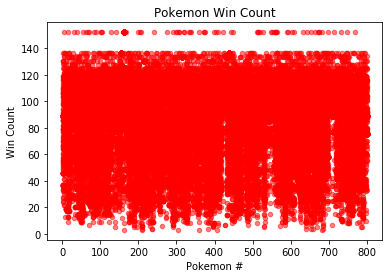

In [181]:
combats_df.plot(kind='scatter', x='#', y='Win Count', alpha=.5, color='red')
plt.xlabel('Pokemon #')
plt.ylabel('Win Count')

plt.title('Pokemon Win Count')

plt.show()

In [182]:
#for k in range(len(pokemon_df)):
#    print(won_df(k))

In [183]:
from PIL import Image
im = Image.open("pokemon_montage.png")

pokemon_images = []
y = 0
x = 0
i = 0
for k in range(835):
    i = k % 40
    if (k % 40 == 0):
        y += 126.75
    x = i*126
    crop_rectangle = (x, y-126.75, x+126, y)
    cropped_im = im.crop(crop_rectangle)
    pokemon_images.append(cropped_im)



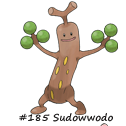

In [184]:
pokemon_images[200]

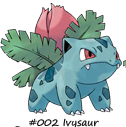

In [185]:
pokemon_images[1]

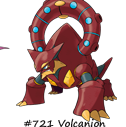

In [186]:
pokemon_images[834]

In [187]:
print(list(result))

['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Battle Pokemon', 'Winner']


## implement one hot encode
### it removed the NaN values from type 2

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Type 1', 'Type 2', 'Battle Pokemon']

new_data_frame = pd.get_dummies(result, columns = cat_features)
new_data_frame

#  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Winner  Type 1_Bug  \
0        1  45      49       49       65       65     45   679.0           0   
1        1  45      49       49       65       65     45   687.0           0   
2        1  45      49       49       65       65     45   557.0           0   
3        1  45      49       49       65       65     45   766.0           0   
4        1  45      49       49       65       65     45   153.0           0   
5        1  45      49       49       65       65     45     1.0           0   
6        1  45      49       49       65       65     45   604.0           0   
7        1  45      49       49       65       65     45     1.0           0   
8        1  45      49       49       65       65     45     1.0           0   
9        1  45      49       49       65       65     45   717.0           0   
10       1  45      49       49       65       65     45   381.0           0   
11       1  45      49       49       65       65     45    54.0           0   
12       1  45      49       49       65       65     45     1.0           0   
13       1  45      49       49       65       65     45     1.0           0   
14       1  45      49       49       65       65     45   493.0           0   
15       1  45      49       49       65       65     45   115.0           0   
16       1  45      49       49       65       65     45   351.0           0   
17       1  45      49       49       65       65     45     1.0           0   
18       1  45      49       49       65       65     45   488.0           0   
19       1  45      49       49       65       65     45   503.0           0   
20       1  45      49       49       65       65     45   483.0           0   
21       1  45      49       49       65       65     45     1.0           0   
22       1  45      49       49       65       65     45   372.0           0   
23       1  45      49       49       65       65     45   649.0           0   
24       1  45      49       49       65       65     45   185.0           0   
25       1  45      49       49       65       65     45   112.0           0   
26       1  45      49       49       65       65     45     6.0           0   
27       1  45      49       49       65       65     45     1.0           0   
28       1  45      49       49       65       65     45   714.0           0   
29       1  45      49       49       65       65     45   162.0           0   
...    ...  ..     ...      ...      ...      ...    ...     ...         ...   
49986  800  80     110      120      130       90     70   758.0           0   
49987  800  80     110      120      130       90     70   800.0           0   
49988  800  80     110      120      130       90     70   800.0           0   
49989  800  80     110      120      130       90     70   800.0           0   
49990  800  80     110      120      130       90     70   800.0           0   
49991  800  80     110      120      130       90     70   800.0           0   
49992  800  80     110      120      130       90     70   800.0           0   
49993  800  80     110      120      130       90     70   800.0           0   
49994  800  80     110      120      130       90     70   800.0           0   
49995  800  80     110      120      130       90     70   280.0           0   
49996  800  80     110      120      130       90     70   474.0           0   
49997  800  80     110      120      130       90     70   800.0           0   
49998  800  80     110      120      130       90     70   800.0           0   
49999  800  80     110      120      130       90     70   800.0           0   
50000  800  80     110      120      130       90     70   623.0           0   
50001  800  80     110      120      130       90     70   800.0           0   
50002  800  80     110      120      130       90     70   472.0           0   
50003  800  80     110      120      130       90     70    62.0           0   
50004  80

In [26]:
new_data_frame.isnull().sum()

#                        0
HP                       0
Attack                   0
Defense                  0
Sp. Atk                  0
Sp. Def                  0
Speed                    0
Winner                  16
Type 1_Bug               0
Type 1_Dark              0
Type 1_Dragon            0
Type 1_Electric          0
Type 1_Fairy             0
Type 1_Fighting          0
Type 1_Fire              0
Type 1_Flying            0
Type 1_Ghost             0
Type 1_Grass             0
Type 1_Ground            0
Type 1_Ice               0
Type 1_Normal            0
Type 1_Poison            0
Type 1_Psychic           0
Type 1_Rock              0
Type 1_Steel             0
Type 1_Water             0
Type 2_Bug               0
Type 2_Dark              0
Type 2_Dragon            0
Type 2_Electric          0
                        ..
Battle Pokemon_770.0     0
Battle Pokemon_771.0     0
Battle Pokemon_772.0     0
Battle Pokemon_773.0     0
Battle Pokemon_774.0     0
Battle Pokemon_775.0     0
B

In [27]:
new_data_frame = new_data_frame.dropna()

In [28]:
new_data_frame.isnull().sum()

#                       0
HP                      0
Attack                  0
Defense                 0
Sp. Atk                 0
Sp. Def                 0
Speed                   0
Winner                  0
Type 1_Bug              0
Type 1_Dark             0
Type 1_Dragon           0
Type 1_Electric         0
Type 1_Fairy            0
Type 1_Fighting         0
Type 1_Fire             0
Type 1_Flying           0
Type 1_Ghost            0
Type 1_Grass            0
Type 1_Ground           0
Type 1_Ice              0
Type 1_Normal           0
Type 1_Poison           0
Type 1_Psychic          0
Type 1_Rock             0
Type 1_Steel            0
Type 1_Water            0
Type 2_Bug              0
Type 2_Dark             0
Type 2_Dragon           0
Type 2_Electric         0
                       ..
Battle Pokemon_770.0    0
Battle Pokemon_771.0    0
Battle Pokemon_772.0    0
Battle Pokemon_773.0    0
Battle Pokemon_774.0    0
Battle Pokemon_775.0    0
Battle Pokemon_776.0    0
Battle Pokem

In [29]:
new_data_frame.shape

(50000, 828)

In [30]:
print(list(new_data_frame.loc[:, new_data_frame.columns != 'Winner']))

#print(list(new_data_frame.columns.values))

['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water', 'Battle Pokemon_1.0', 'Battle Pokemon_2.0', 'Battle Pokemon_3.0', 'Battle Pokemon_4.0', 'Battle Pokemon_5.0', 'Battle Pokemon_6.0', 'Battle Pokemon_7.0', 'Battle Pokemon_8.0', 'Battle Pokemon_9.0', 'Battle Pokemon_10.0', 'Battle Pokemon_11.0', 'Battle Pokemon_13.0', 'Battle Pokemon_14.0', 'Battle Pokemon_15.0', 'Battle Pokemon_16.0', 'Battle Poke

In [31]:
from sklearn.model_selection import train_test_split

features = list(new_data_frame.loc[:, new_data_frame.columns != 'Winner'])
label = ["Winner"]

x = new_data_frame[features]
y = new_data_frame[label]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 3)

In [32]:
x_train.shape

(35000, 827)

In [33]:
y_train.shape

(35000, 1)

In [34]:
print(np.ravel(y_train))

[ 350.   93.  560. ...,  143.   28.  157.]


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_predict)

print (knn_accuracy)


0.406666666667


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

my_logreg = LogisticRegression()
my_logreg.fit(x_train, y_train)
y_predict_lr = my_logreg.predict(x_test)

log_accuracy = accuracy_score(y_test, y_predict_lr)

print(log_accuracy)

In [58]:
my_decisiontree = DecisionTreeClassifier()
my_decisiontree.fit(x_train, y_train)
y_predict_dt = my_decisiontree.predict(x_test)

dec_tree_accuracy = accuracy_score(y_test, y_predict_dt)
print(dec_tree_accuracy)

0.8366


In [64]:
ran_forest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state = 2)
ran_forest.fit(x_train, y_train.values.ravel())
y_predict_rf = ran_forest.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_predict_rf)
print(rf_accuracy)

0.831666666667


from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF([1.0])

gaus = GaussianProcessClassifier(kernel = kernel)
gaus.fit(x_train, y_train.values.ravel())
y_predict_gaus = gaus.predict(x_test)

gaus_accuracy = accuracy_score(y_test, y_predict_gaus)
print(gaus_accuracy)

In [91]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train.values.ravel())
y_predict_nb = gaussian_nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_predict_nb)
print(nb_accuracy)

0.195066666667


In [46]:
ex_trees = ExtraTreesClassifier(random_state = 0, n_estimators = 10)
ex_trees.fit(x_train, y_train.values.ravel())
y_predict_ex_tree = ex_trees.predict(x_test)

ex_tree_accuracy = accuracy_score(y_test, y_predict_ex_tree)
print(ex_tree_accuracy)

0.833266666667


In [41]:
bag_class = BaggingClassifier()
bag_class.fit(x_train, y_train.values.ravel())
y_predict_bag = bag_class.predict(x_test)

bag_class_accuracy = accuracy_score(y_test, y_predict_bag)
print(bag_class_accuracy)

0.863266666667


In [47]:
ada_boost = AdaBoostClassifier(random_state = 0,)
ada_boost.fit(x_train, y_train.values.ravel())
y_predict_ada = ada_boost.predict(x_test)

ada_boost_accuracy = accuracy_score(y_test, y_predict_ada)
print(1 - ada_boost_accuracy)

0.986666666667


# __`combats_df`__

In [18]:
combats_df.head()

#  Battle Pokemon  Winner
0  266             298     298
1  702             701     701
2  191             668     668
3  237             683     683
4  151             231     151

#### Print shape of combats_df

In [19]:
combats_df.shape

(50000, 3)

# __`tests_df`__

In [20]:
tests_df.head()

First_pokemon  Second_pokemon
0            129             117
1            660             211
2            706             115
3            195             618
4             27             656

#### Print shape of tests_df

In [21]:
tests_df.shape

(10000, 2)